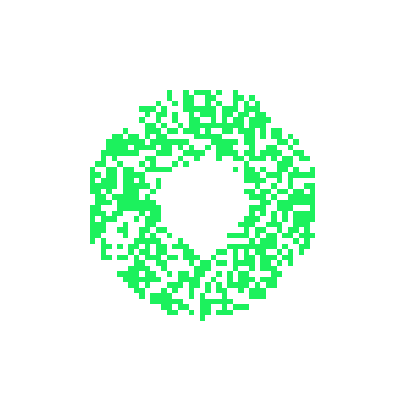

In [11]:
from TumorAngiogenesisSynchro import Tissue
from TumorAngiogenesisSynchro import CellType
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

automatonWidth = 150
automatonHeight = 150

tumor = Tissue(automatonWidth, automatonHeight)
tumor = tumor.importTumorInstance("avascular_instance.pkl")

img = np.ones((automatonHeight, automatonWidth,3))
proliferatingPositions = tumor.getProliferatingLocations()
proliferatingColor = CellType.PROLIFERATING.value

for i in range(0,automatonHeight):
    for j in range(0,automatonWidth):
        if(proliferatingPositions[i,j] == 1):
            img[i,j,:] = proliferatingColor


plt.figure(figsize = (5,5))
plt.imshow(img)
plt.axis('off')
plt.xlim([40,110])
plt.ylim([40,110])
plt.savefig('proliferating_image.png', dpi=600, bbox_inches='tight')

100%|█████████████████████████████████████| 1096/1096 [00:00<00:00, 1940.53it/s]


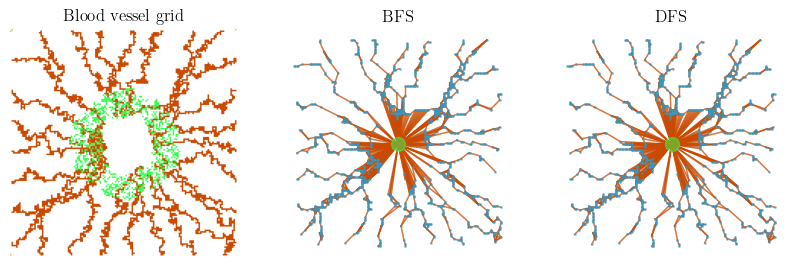

In [16]:
from BloodVesselGraph import AutomatonToGraph
from BloodVesselGraph import BloodVesselGraph
from BloodVesselGraph import GraphSketchType
from BloodVesselGraph import SearchType

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('axes', labelsize=20) 
rc('xtick', labelsize=14)
rc('ytick',labelsize = 14)

tumor = Tissue(150,150)
tumor = tumor.importTumorInstance("vascular_tumor_sample.pkl")

automatonToGraph = AutomatonToGraph()
occupiedCells = tumor.angiogenesisModule.occupiedCells
proliferatingPositions = tumor.getProliferatingLocations()

bloodVesselNetworkBFS = automatonToGraph.convertAutomatonToGraphWithTumor(occupiedCells, proliferatingPositions, method = SearchType.BFS)
bloodVesselNetworkDFS = automatonToGraph.convertAutomatonToGraphWithTumor(occupiedCells, proliferatingPositions, method = SearchType.DFS)

fig, ax = plt.subplots(1, 3, figsize = (10,5))
ax[0].imshow(tumor.networkMovie[:,:,:,-2])
ax[0].set_title("Blood vessel grid")
ax[0].axis("off")
ax[1].set_title("BFS")
bloodVesselNetworkBFS.drawGraph(1,ax[1],GraphSketchType.ORIGINAL)
ax[1].axis("off")
ax[1].set_aspect('equal')
ax[2].set_title("DFS")
ax[2].set_aspect('equal')
bloodVesselNetworkDFS.drawGraph(1,ax[2], GraphSketchType.ORIGINAL)
ax[2].axis("off")
plt.savefig('Figures/bfs_dfs_comparison.pdf', format='pdf', dpi=600, bbox_inches='tight')

